# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
## Import Dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time


In [3]:
## Weather API key
from api_keys import weather_api_key

In [4]:
## Import citipy
from citipy import citipy

## Generate Cities List

In [5]:
## Latitude and longitude ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

## Cities list and latitudes-longitudes list
cities = []
lats_lngs_list = []


In [6]:
## Radomize latitudes and longitudes, and set combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1300)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1300)
lats_lngs_list = zip(lats,lngs)

In [7]:
## Find nearest city for latitude and longitude combination using citipy
for i in lats_lngs_list:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    ## If city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)
        
## Confirm count is above 500
print(len(cities))

557


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
## Perform a weather check on each city

## Set up lists to hold reponse info
city_list = []
temps = []
humidity = []
clouds = []
winds = []
latitudes = []
longitudes = []
countries = []
date = []

In [9]:
## Set URL and Units
#url = "https://openweathermap.org/api"
units = "imperial"
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='


In [10]:
## Loop counters
counter = 0
set_counter = 1

In [11]:
## Loop through the list of cities and perform a request for data on each
for i in cities:
    try:
        response = requests.get(base_url + i.replace(" ","&")).json()
        temps.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        countries.append(response['sys']['country'])
        date.append(response['dt'])
        if counter > 50:
            counter = 1
            set_counter += 1
            city_list.append(i)
        else:
            counter += 1
            city_list.append(i)
        print(f"Processing Record {counter} of Set {set_counter} | {i}")
    except:
        print("City not found. Skipping request...")
print("--------------\nData Retrieval Complete\n--------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | seabra
Processing Record 6 of Set 1 | bermeo
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | ayan
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | punta arenas
City not found. Skipping request...
Processing Record 16 of Set 1 | clearwater
Processing Record 17 of Set 1 | brigantine
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | meulaboh
Processing Record 20 of Set 1 | ketchikan
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | isangel
Processing Record 23 of Set 1 | bin qirdan
City not found. Skipping reques

Processing Record 33 of Set 4 | zyryanka
Processing Record 34 of Set 4 | campbell river
Processing Record 35 of Set 4 | luxor
Processing Record 36 of Set 4 | padang
Processing Record 37 of Set 4 | kamenica
City not found. Skipping request...
Processing Record 38 of Set 4 | beringovskiy
Processing Record 39 of Set 4 | dawei
City not found. Skipping request...
Processing Record 40 of Set 4 | fowa
Processing Record 41 of Set 4 | jacareacanga
Processing Record 42 of Set 4 | constitucion
City not found. Skipping request...
Processing Record 43 of Set 4 | tevriz
Processing Record 44 of Set 4 | dracena
City not found. Skipping request...
Processing Record 45 of Set 4 | okha
Processing Record 46 of Set 4 | marmarion
Processing Record 47 of Set 4 | kailaras
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | nisia floresta
Processing Record 51 of Set 4 | alofi
City not found. Skipping request...
Processing Record 1 of Set 5 

Processing Record 10 of Set 8 | fleury-les-aubrais
Processing Record 11 of Set 8 | shaowu
Processing Record 12 of Set 8 | sioux lookout
City not found. Skipping request...
Processing Record 13 of Set 8 | aksu
Processing Record 14 of Set 8 | tosya
City not found. Skipping request...
Processing Record 15 of Set 8 | esperance
Processing Record 16 of Set 8 | stryn
Processing Record 17 of Set 8 | suntar
Processing Record 18 of Set 8 | kiruna
Processing Record 19 of Set 8 | nuuk
Processing Record 20 of Set 8 | monrovia
Processing Record 21 of Set 8 | barra patuca
Processing Record 22 of Set 8 | sur
Processing Record 23 of Set 8 | angoche
Processing Record 24 of Set 8 | tiarei
Processing Record 25 of Set 8 | horta
Processing Record 26 of Set 8 | longyearbyen
Processing Record 27 of Set 8 | chimbote
Processing Record 28 of Set 8 | port pirie
Processing Record 29 of Set 8 | nome
Processing Record 30 of Set 8 | doha
Processing Record 31 of Set 8 | zhicheng
Processing Record 32 of Set 8 | prilado

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_df = pd.DataFrame({"City": city_list, 
                "Latitude": latitudes, 
                "Longitude": longitudes, 
                "Humidity": humidity, 
                "Max Temp": temps, 
                "Cloudiness": clouds, 
                "Wind Speed": winds, 
                "Country": countries, 
                "Date": date,
                })



In [13]:
weather_df.count()

City          502
Latitude      502
Longitude     502
Humidity      502
Max Temp      502
Cloudiness    502
Wind Speed    502
Country       502
Date          502
dtype: int64

In [14]:
weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,35,71.60,75,9.22,AU,1619840524
1,fortuna,40.5982,-124.1573,100,53.01,1,3.38,US,1619840507
2,upernavik,72.7868,-56.1549,76,23.07,100,4.32,GL,1619840525
3,faanui,-16.4833,-151.7500,69,81.45,91,9.33,PF,1619840362
4,seabra,-12.4186,-41.7703,100,68.00,90,4.61,BR,1619840525


In [15]:
## export to csv
weather_df.to_csv("weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
weather_df.describe()

,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,23.510301,14.112177,69.450199,60.787948,56.366534,7.686952,1.619841e+09
std,31.992181,85.573376,23.838539,19.227269,39.124413,5.870534,8.068429e+01
min,-54.800000,-175.200000,1.000000,12.200000,0.000000,0.110000,1.619840e+09
25%,-2.631100,-56.324775,56.000000,45.035000,20.000000,3.510000,1.619841e+09
50%,28.997100,14.853750,75.000000,64.040000,75.000000,5.840000,1.619841e+09
75%,49.951650,77.950450,88.000000,77.000000,94.750000,10.360000,1.619841e+09
max,78.218600,179.316700,100.000000,98.850000,100.000000,59.840000,1.619841e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
## Max Humidity in the DataFrame.describe is 100, so I believe none are greater than 100.

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

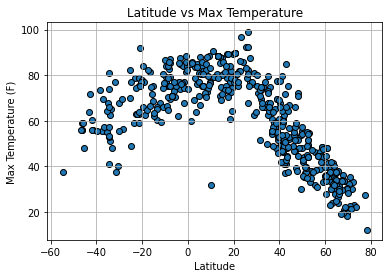

In [19]:
x_values = weather_df["Latitude"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values,y_values, marker= "o", edgecolor= "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Max Temperature")
plt.grid()

# Save figure as .png
plt.savefig("Latitude vs Max Temperature.png")

plt.show()


The scatter plot above is analyzing the max temperature values based on distance from the equator (0° Latitude).  The temps rise as you get closer to the equator.

## Latitude vs. Humidity Plot

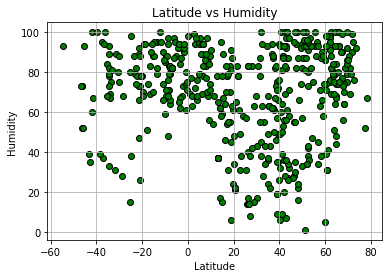

In [20]:
x_values = weather_df["Latitude"]
y_values = weather_df["Humidity"]
plt.scatter(x_values,y_values, marker= "o", edgecolor= "black", color= "green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.grid()

# Save figure as .png
plt.savefig("Latitude vs Humidity.png")

plt.show()


The scatter plot above is analyzing the humidity values based on distance from the equator (0° Latitude).  The humidity levels don't seem to have a clear trend in regards to equator.

## Latitude vs. Cloudiness Plot

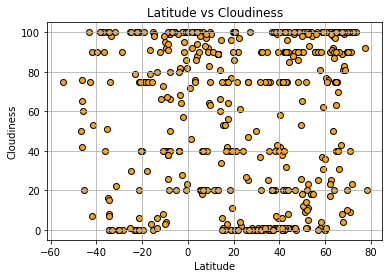

In [21]:
x_values = weather_df["Latitude"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values,y_values, marker= "o", edgecolor= "black", color= "orange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.grid()

# Save figure as .png
plt.savefig("Latitude vs Cloudiness.png")

plt.show()


The scatter plot above is analyzing the cloudiness levels based on distance from the equator (0° Latitude). There looks to be no correlation between the cloudiness and a city's latitude.

## Latitude vs. Wind Speed Plot

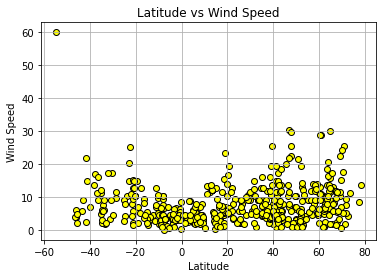

In [22]:
x_values = weather_df["Latitude"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values,y_values, marker= "o", edgecolor= "black", color= "yellow")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.grid()

# Save figure as .png
plt.savefig("Latitude vs Wind Speed.png")

plt.show()


The scatter plot above is analyzing the wind speeds based on distance from the equator (0° Latitude). There appears to be no releationship between the wind speed and a city's latitude.

## Linear Regression

In [23]:
## Create a df for both the northern and southern hemispheres
northern_df = weather_df.loc[(weather_df["Latitude"] >= 0)]
southern_df = weather_df.loc[(weather_df["Latitude"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.8849033281697519


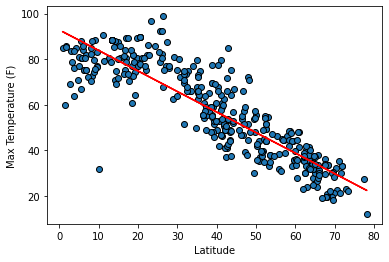

In [24]:
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("NH_Latitude_vs_Max_Temp.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.654478255410643


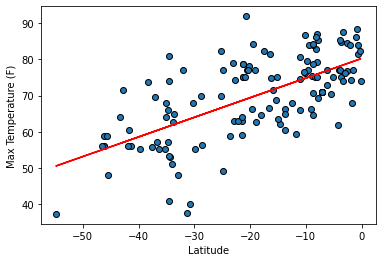

In [25]:
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("SH_Latitude_vs_Max_Temp.png")

plt.show()


Seeing the scatter plots and linear regression for both hemispheres, there is strong relationship between temperature and a city's distance from the equator (0° Latitude).  The Northern Hemisphere's line shows the temperatures decreases as city locations are further from the equator, and the Southern hemisphere's line shows temeratures increasing as city's are closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.17057982965878227


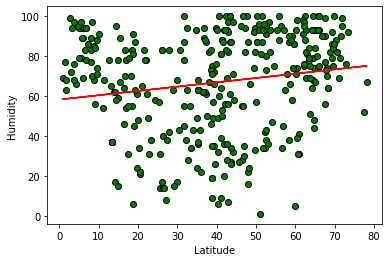

In [26]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "green")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("NH_Latitude_vs_Humidity.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.2468402531782078


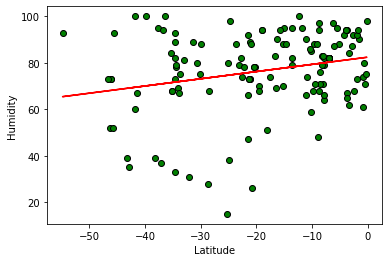

In [27]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "green")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("SH_Latitude_vs_Humidity.png")

plt.show()


Based on the line/plots and the r-square scores, the is not a strong correlation between city latitude and humidity level in either hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.10275657384396854


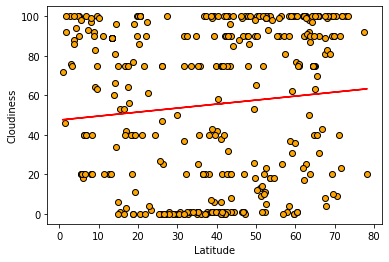

In [28]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "orange")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("NH_Latitude_vs_Cloudiness.png")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.17943174038906481


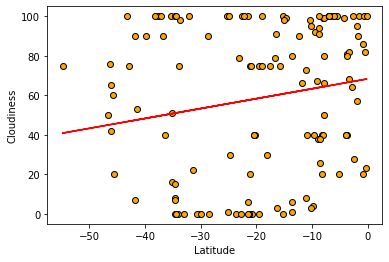

In [29]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "orange")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("SH_Latitude_vs_Cloudiness.png")

plt.show()


Based on the line/plots and the r-square scores, the is not a strong correlation between city latitude and cloudiness in either hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.2260369378859136


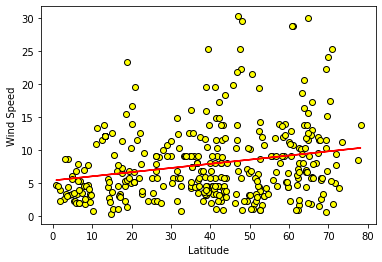

In [30]:
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "yellow")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("NH_Latitude_vs_WindSpeed.png")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.38753901828752585


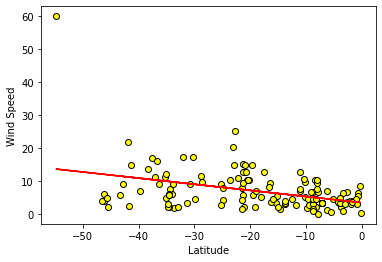

In [31]:
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "yellow")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("SH_Latitude_vs_WindSpeed.png")

plt.show()


Based on the line/plots and the r-square scores, the is not a strong correlation between city latitude and wind speeds in either hemisphere.

# Observable Trends Based on Data

1.  Plotting the Max Temp vs Latitude proved that temperatures are generally higher as we approach the equator (strong correlation).  On the scatter plots, the Northern Hemisphere's line shows the temperatures decreases as city locations are further from the equator, and the Southern hemisphere's line shows temeratures increasing as city's are closer to the equator.

2.  There does not seem to be a correlation between latitude and humidity or cloudiness.

3.  Based on the r-squared scores the does not seem to be a strong correlation between latitude and wind speed, but the wind speeds look to be a little higher as we move away from the equator.